<a href="https://colab.research.google.com/github/Manoj250/Housing-price-prediction-using-deep-learning/blob/main/Housing_price_prediction_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [46]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [48]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler



x = df.drop(['Price'], axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [51]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(15, input_dim=13, activation='relu'))
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam',metrics="mse")


In [52]:
history = model.fit(x_train, y_train, epochs=200,validation_data=(x_test, y_test), verbose=1)

Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 580.1108 - mse: 580.1108 - val_loss: 594.5563 - val_mse: 594.5563
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 569.6902 - mse: 569.6902 - val_loss: 584.1534 - val_mse: 584.1534
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 558.7038 - mse: 558.7038 - val_loss: 572.3792 - val_mse: 572.3792
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 546.4531 - mse: 546.4531 - val_loss: 558.8794 - val_mse: 558.8794
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 532.3546 - mse: 532.3546 - val_loss: 543.0189 - val_mse: 543.0189
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 515.7842 - mse: 515.7842 - val_loss: 524.0568 - val_mse: 524.0568
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 495.6058 - mse: 495.6058 - val_loss: 501.7686 - val_mse: 501.7686
Epoch 8/200
13/13 [=======

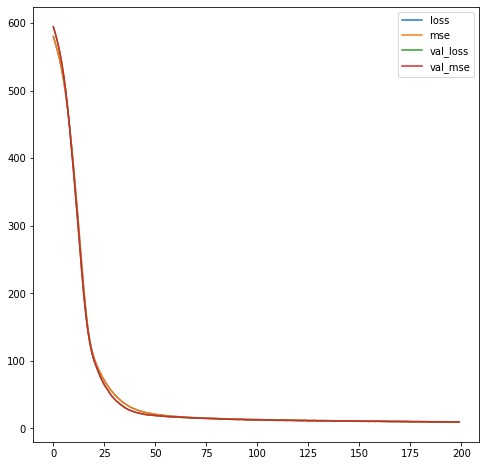

In [53]:
pd.DataFrame(history.history).plot(figsize=(8,8))

In [54]:
y_pred = model.predict(x_test)

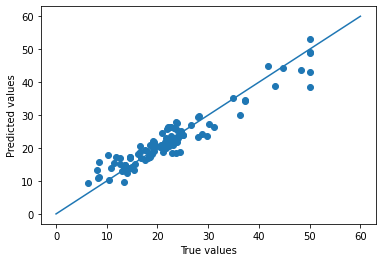

In [55]:
import matplotlib.pyplot as plt


plt.scatter(y_test.values.flatten(), y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.plot([0, 60], [0, 60])
